In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/23-24 Senior Year/CSML/FinalProject')
print(os.getcwd())

/content/drive/MyDrive/23-24 Senior Year/CSML/FinalProject


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [4]:
data = pd.read_excel('finalCSMLinputWarfarin.xlsx')

In [5]:
# Exploratory Analysis

In [6]:
data

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
0,male,White,60 - 69,193.040,115.70,NaN,0.0,0.0,2.5,2.60,*1/*1,A/G,49.00
1,female,White,50 - 59,176.530,144.20,NaN,0.0,0.0,2.5,2.15,*1/*1,A/A,42.00
2,female,White,40 - 49,162.560,77.10,NaN,0.0,0.0,2.5,1.90,*1/*1,G/G,53.00
3,male,White,60 - 69,182.245,90.70,NaN,0.0,0.0,2.5,2.40,*1/*1,A/G,28.00
4,male,White,50 - 59,167.640,72.60,NaN,0.0,0.0,2.5,1.90,*1/*3,A/G,42.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,male,White,20 - 29,185.420,113.64,0.0,0.0,0.0,NaN,2.80,*1/*1,NaN,52.50
5696,female,White,70 - 79,160.020,55.91,0.0,0.0,0.0,NaN,2.80,*1/*3,NaN,27.51
5697,male,White,60 - 69,187.960,97.73,0.0,0.0,0.0,NaN,2.00,*1/*1,NaN,57.47
5698,male,White,60 - 69,177.800,87.27,0.0,0.0,0.0,NaN,2.00,NaN,NaN,70.00


In [7]:
data.describe()

,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Therapeutic Dose of Warfarin
count,4554.000000,5413.000000,3283.000000,3861.000000,4182.000000,1259.000000,4968.000000,5528.000000
mean,168.047778,77.852569,0.187024,0.146335,0.066236,2.538324,2.364438,30.977887
std,10.845992,21.859764,0.389990,0.353488,0.248724,0.198140,0.464644,16.801048
min,124.968000,30.000000,0.000000,0.000000,0.000000,1.300000,0.800000,2.100000
25%,160.020000,62.000000,0.000000,0.000000,0.000000,2.500000,2.100000,19.530000
50%,167.894000,75.000000,0.000000,0.000000,0.000000,2.500000,2.400000,28.000000
75%,176.022000,90.000000,0.000000,0.000000,0.000000,2.500000,2.610000,38.500000
max,202.000000,237.700000,1.000000,1.000000,1.000000,3.500000,6.100000,315.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5696 non-null   object 
 1   Race (Reported)                                                    5194 non-null   object 
 2   Age                                                                5658 non-null   object 
 3   Height (cm)                                                        4554 non-null   float64
 4   Weight (kg)                                                        5413 non-null   float64
 5   Diabetes                                                           3283 non-null   float64
 6   Simvastatin (Zocor)                                                3861 non-null   float64
 7   Amiodarone (Cordarone)  

In [9]:
# First drop all values we dont have a target label for
# data = data.dropna(subset = 'Therapeutic Dose of Warfarin')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5696 non-null   object 
 1   Race (Reported)                                                    5194 non-null   object 
 2   Age                                                                5658 non-null   object 
 3   Height (cm)                                                        4554 non-null   float64
 4   Weight (kg)                                                        5413 non-null   float64
 5   Diabetes                                                           3283 non-null   float64
 6   Simvastatin (Zocor)                                                3861 non-null   float64
 7   Amiodarone (Cordarone)  

In [11]:
data.columns

Index(['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
       'Target INR', 'INR on Reported Therapeutic Dose of Warfarin',
       'Cyp2C9 genotypes',
       'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T',
       'Therapeutic Dose of Warfarin'],
      dtype='object')

In [12]:
# data.get('Gender')

In [13]:
# First Gender
leGender = LabelEncoder()
leGender.fit(data.get('Gender'))
print(list(leGender.classes_))

['female', 'male', nan]


In [14]:
data.iloc[:,0] = leGender.transform(data.iloc[:,0]).astype(float)

<ipython-input-14-b1f62be23b9d>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,0] = leGender.transform(data.iloc[:,0]).astype(float)


In [15]:
# Next Race
leRace = LabelEncoder()
leRace.fit(data.get('Race (Reported)'))
print(list(leRace.classes_))

['African-American', 'Asian', 'Black', 'Black African', 'Black Caribbean', 'Black or African American', 'Black other', 'Caucasian', 'Chinese', 'Han Chinese', 'Hispanic', 'Indian', 'Intermediate', 'Japanese', 'Korean', 'Malay', 'Other', 'Other (Black British)', 'Other (Hungarian)', 'Other Mixed Race', 'White', 'other', nan]


In [16]:
data.iloc[:,1] = leRace.transform(data.iloc[:,1]).astype(float)

<ipython-input-16-35d7405e12f1>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,1] = leRace.transform(data.iloc[:,1]).astype(float)


In [17]:
# Next Age
leAge = LabelEncoder()
leAge.fit(data.get('Age'))
print(list(leAge.classes_))

['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90+', nan]


In [18]:
data.iloc[:,2] = leAge.transform(data.iloc[:,2]).astype(float)

<ipython-input-18-0ba9b2b551b4>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,2] = leAge.transform(data.iloc[:,2]).astype(float)


In [19]:
# Cyp2c9 genotypes
leCyp2c9 = LabelEncoder()
leCyp2c9.fit(data.get('Cyp2C9 genotypes'))
print(list(leCyp2c9.classes_))

['*1/*1', '*1/*11', '*1/*13', '*1/*14', '*1/*2', '*1/*3', '*1/*5', '*1/*6', '*2/*2', '*2/*3', '*3/*3', nan]


In [20]:
data.iloc[:,10] = leCyp2c9.transform(data.iloc[:,10]).astype(float)

<ipython-input-20-2724ee94df8c>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,10] = leCyp2c9.transform(data.iloc[:,10]).astype(float)


In [21]:
# Lastly VKORC1
leVKORC1 = LabelEncoder()
leVKORC1.fit(data.get('VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'))
print(list(leVKORC1.classes_))

['A/A', 'A/G', 'G/G', nan]


In [22]:
data.iloc[:,11] = leVKORC1.transform(data.iloc[:,11]).astype(float)

<ipython-input-22-d932444c3e8e>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,11] = leVKORC1.transform(data.iloc[:,11]).astype(float)


In [23]:
# Trial for Deiabetes imputer
leDiabetes = LabelEncoder()
leDiabetes.fit(data.get('Diabetes'))
print(list(leDiabetes.classes_))

[0.0, 1.0, nan]


In [24]:
data.iloc[:,5] = leDiabetes.transform(data.iloc[:,5]).astype(float)

In [25]:
# data.to_csv('leWarfarinInput1.csv')

In [26]:
# Apply Missing indicators
step2_MissingIndicator = MissingIndicator() # Create an MissingIndicator instance
step2_MIVs = step2_MissingIndicator.fit_transform(data.iloc[:,6:8]) # Generate MIVs
step2_MIVs_df = pd.DataFrame(step2_MIVs, columns=data.iloc[:,6:8].columns + '_miss').replace({False: 0,True: 1})

In [27]:
step2_MIVs_df

,Simvastatin (Zocor)_miss,Amiodarone (Cordarone)_miss
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5695,0,0
5696,0,0
5697,0,0
5698,0,0


In [28]:
# Imputation KNN values for whole DataFrame (only certain columns will be selected)
knn_imputer = KNNImputer(n_neighbors=3)
impute_knn = knn_imputer.fit_transform(data)
# impute_knn_df = pd.DataFrame(impute_knn, columns=data.iloc[:,4:6].columns + '_KNNimpute')
# Concatenate the original dataset and the imputed data
# impute_knn_df = pd.concat([data, impute_knn_df], axis=1)
df_temp = pd.DataFrame(impute_knn)
df_temp.columns = data.columns + '_impute'
df_temp.columns

Index(['Gender_impute', 'Race (Reported)_impute', 'Age_impute',
       'Height (cm)_impute', 'Weight (kg)_impute', 'Diabetes_impute',
       'Simvastatin (Zocor)_impute', 'Amiodarone (Cordarone)_impute',
       'Target INR_impute',
       'INR on Reported Therapeutic Dose of Warfarin_impute',
       'Cyp2C9 genotypes_impute',
       'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T_impute',
       'Therapeutic Dose of Warfarin_impute'],
      dtype='object')

In [29]:
df_temp.shape

(5700, 13)

In [30]:
# # Simple Imputation KNN values
# knn_imputer = KNNImputer(n_neighbors=3)
# impute_knnINR = knn_imputer.fit_transform(data.iloc[:,10])
# impute_knnINR_df = pd.DataFrame(impute_knnINR, columns=data.iloc[:,10].columns + '_KNNimpute')
# # Concatenate the original dataset and the imputed data
# # impute_knn_df = pd.concat([data, impute_knn_df], axis=1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5700 non-null   float64
 1   Race (Reported)                                                    5700 non-null   float64
 2   Age                                                                5700 non-null   float64
 3   Height (cm)                                                        4554 non-null   float64
 4   Weight (kg)                                                        5413 non-null   float64
 5   Diabetes                                                           5700 non-null   float64
 6   Simvastatin (Zocor)                                                3861 non-null   float64
 7   Amiodarone (Cordarone)  

In [32]:
step2_MIVs_df.shape

(5700, 2)

In [33]:
# Target INR
med = data.iloc[:,8].median()
data.iloc[:,8] = data.iloc[:,8].fillna(value=med)

In [34]:
data = data.dropna(subset = 'Therapeutic Dose of Warfarin')

In [35]:
# Begin final assignments
data['Height (cm)'] = df_temp['Height (cm)_impute']
data['Weight (kg)'] = df_temp['Weight (kg)_impute']
data['Simvastatin (Zocor)'] = step2_MIVs_df['Simvastatin (Zocor)_miss'].astype(float)
data['Amiodarone (Cordarone)'] = step2_MIVs_df['Amiodarone (Cordarone)_miss'].astype(float)
data['INR on Reported Therapeutic Dose of Warfarin'] = df_temp['INR on Reported Therapeutic Dose of Warfarin_impute']

<ipython-input-35-403f672e1a9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Height (cm)'] = df_temp['Height (cm)_impute']
<ipython-input-35-403f672e1a9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weight (kg)'] = df_temp['Weight (kg)_impute']
<ipython-input-35-403f672e1a9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5528 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5528 non-null   float64
 1   Race (Reported)                                                    5528 non-null   float64
 2   Age                                                                5528 non-null   float64
 3   Height (cm)                                                        5528 non-null   float64
 4   Weight (kg)                                                        5528 non-null   float64
 5   Diabetes                                                           5528 non-null   float64
 6   Simvastatin (Zocor)                                                5528 non-null   float64
 7   Amiodarone (Cordarone)  

In [37]:
data.to_csv('preprocessedWarfarinCSML.csv')

In [38]:
import matplotlib.pyplot as plt

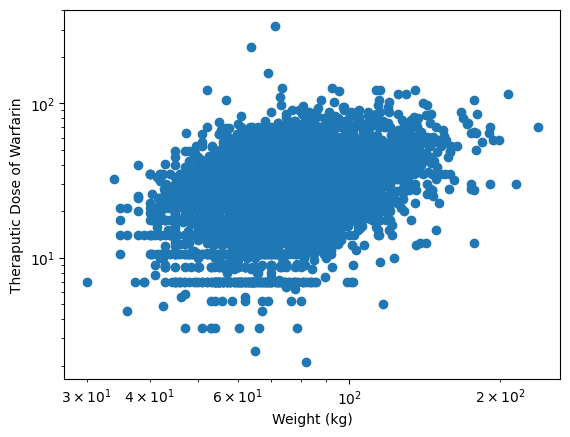

In [39]:
plt.scatter(data.iloc[:,4],data.iloc[:,12])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Weight (kg)")
plt.ylabel("Theraputic Dose of Warfarin")
plt.show()

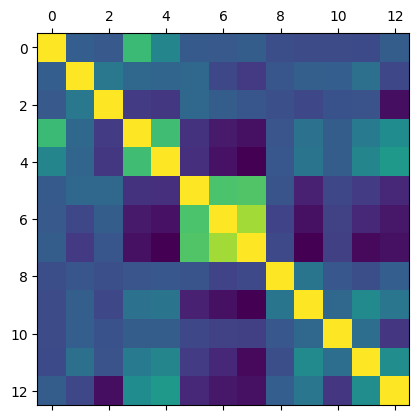

In [40]:
plt.matshow(data.corr())
plt.show()